In [3]:
!pip3 install networkx

In [0]:
import matplotlib
matplotlib.use('TkAgg')
from pylab import *
import networkx as nx
import random as rd

def initialize():
    global g
    g = nx.karate_club_graph()
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if random() < .5 else 0

def observe():
    global g
    cla()
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)

def update():
    global g
    listener = rd.choice(list(g.nodes))
    speaker = rd.choice(list(g.neighbors(listener)))
    g.nodes[listener]['state'] = g.nodes[speaker]['state']

#New update function for the reversed rule
def update_reversed():
    global g
    speaker = rd.choice(list(g.nodes))
    listener = rd.choice(list(g.neighbors(speaker)))
    g.nodes[listener]['state'] = g.nodes[speaker]['state']

def update_edge():
    global g
    edge = rd.choice(list(g.edges))
    if random() < .5:
      speaker, listener = edge[0], edge[1] 
    else:
      speaker, listener = edge[1], edge[0]
    g.nodes[listener]['state'] = g.nodes[speaker]['state']

In [0]:
def simulation(update_function):
  initialize()
  c = 0
  while not (all([g.nodes[i]['state'] == 1 for i in g.nodes]) or all([g.nodes[i]['state'] == 0 for i in g.nodes])):
    update_function()
    c += 1
  return c


In [0]:
#Running the simulation
sim_results=[]
for i in range(5000):
  sim_results.append(simulation(update))

In [88]:
#Printing the results. On average we get a homogeneous state after 606 steps
print(np.mean(sim_results))
print(np.percentile(sim_results, (2.5, 97.5)))

606.9126
[ 112.975 1866.025]


(array([2.423e+03, 1.566e+03, 5.940e+02, 2.380e+02, 1.050e+02, 4.000e+01,
        2.300e+01, 7.000e+00, 3.000e+00, 1.000e+00]),
 array([  45. ,  460.5,  876. , 1291.5, 1707. , 2122.5, 2538. , 2953.5,
        3369. , 3784.5, 4200. ]),
 <a list of 10 Patch objects>)

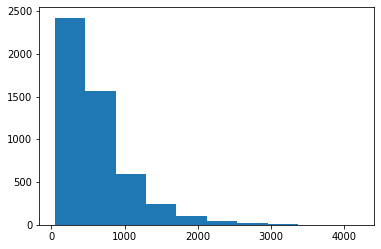

In [89]:
#Plotting the histogram
plt.hist(sim_results)

In [100]:
#When reversed it takes a lot longer so I ran it less times

sim_reversed_results=[]
for i in range(100):
  sim_reversed_results.append(simulation(update_reversed))

print(np.mean(sim_reversed_results))
print(np.percentile(sim_reversed_results, (2.5, 97.5)))

2985.25
[ 376.875 8020.   ]


(array([5.468e+03, 5.840e+02, 2.960e+02, 1.310e+02, 7.300e+01, 4.000e+01,
        2.000e+01, 8.000e+00, 4.000e+00, 2.000e+00]),
 array([   45. ,  1991.5,  3938. ,  5884.5,  7831. ,  9777.5, 11724. ,
        13670.5, 15617. , 17563.5, 19510. ]),
 <a list of 10 Patch objects>)

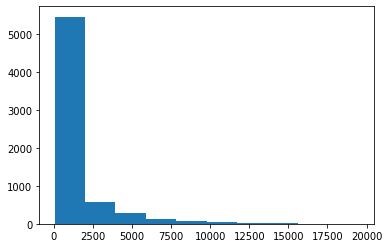

In [101]:
plt.hist(sim_results)

In [126]:
#Updates based on edge selection

sim_edge_results=[]
for i in range(100):
  sim_edge_results.append(simulation(update_edge))

print(np.mean(sim_edge_results))
print(np.percentile(sim_edge_results, (2.5, 97.5)))

1009.9
[ 194.475 3051.275]


(array([5.468e+03, 5.840e+02, 2.960e+02, 1.310e+02, 7.300e+01, 4.000e+01,
        2.000e+01, 8.000e+00, 4.000e+00, 2.000e+00]),
 array([   45. ,  1991.5,  3938. ,  5884.5,  7831. ,  9777.5, 11724. ,
        13670.5, 15617. , 17563.5, 19510. ]),
 <a list of 10 Patch objects>)

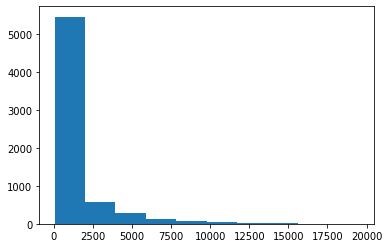

In [127]:
plt.hist(sim_results)